# EDA Features v3 Final

**Dataset:** `data/interim/dataset_v3_features.csv`  
**Objetivo:** Validar estabilidad, coherencia interna y poder discriminativo del extractor v3  
**Fecha:** 2025-12-13

**FEATURES_V3:**
- domain_complexity
- domain_whitelist
- trusted_token_context
- host_entropy
- infra_risk
- brand_in_path
- brand_match_flag


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar dataset (ruta absoluta desde raíz del proyecto)
import os
# Usar ruta absoluta fija basada en la estructura conocida del proyecto
# El notebook está en EDA/, así que subimos dos niveles para llegar a la raíz
notebook_dir = Path("/Users/test/Desktop/phishing-detector")
if notebook_dir.exists():
    ROOT = notebook_dir
else:
    # Fallback: intentar detectar desde cwd
    cwd = Path(os.getcwd())
    if "phishing-detector" in str(cwd):
        # Buscar el directorio phishing-detector en la ruta
        parts = cwd.parts
        idx = list(parts).index("phishing-detector") if "phishing-detector" in parts else -1
        if idx >= 0:
            ROOT = Path(*parts[:idx+1])
        else:
            ROOT = cwd
    else:
        ROOT = cwd

dataset_path = ROOT / "data" / "interim" / "dataset_v3_features.csv"
df = pd.read_csv(dataset_path)
print(f"Dataset cargado desde: {dataset_path}")

FEATURES_V3 = [
    "domain_complexity",
    "domain_whitelist",
    "trusted_token_context",
    "host_entropy",
    "infra_risk",
    "brand_in_path",
    "brand_match_flag"
]

print(f"✓ Dataset cargado: {len(df)} filas")
print(f"✓ Features v3: {len(FEATURES_V3)}")


Dataset cargado desde: /Users/test/Desktop/phishing-detector/data/interim/dataset_v3_features.csv
✓ Dataset cargado: 482 filas
✓ Features v3: 7


## 1) Sanity Check


In [2]:
print("=" * 80)
print("SANITY CHECK")
print("=" * 80)

print(f"\nShape: {df.shape}")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

print("\nTipos de datos:")
print(df.dtypes)

print("\nValores faltantes (NaN):")
print(df.isna().sum())

print("\nValores infinitos:")
print(df.select_dtypes(include=[np.number]).apply(lambda x: np.isinf(x).sum()))

print("\nURLs duplicadas:")
print(f"Total duplicados: {df['url'].duplicated().sum()}")

print("\nBalance de clases (label):")
print(df['label'].value_counts().sort_index())
print(f"\nPorcentajes:")
print(df['label'].value_counts(normalize=True).sort_index() * 100)


SANITY CHECK

Shape: (482, 13)
Filas: 482, Columnas: 13

Tipos de datos:
url                       object
label                      int64
sector                    object
entidad                   object
notas                     object
campaign                  object
domain_complexity        float64
domain_whitelist           int64
trusted_token_context      int64
host_entropy             float64
infra_risk               float64
brand_in_path              int64
brand_match_flag           int64
dtype: object

Valores faltantes (NaN):
url                        0
label                      0
sector                     0
entidad                    0
notas                    148
campaign                 391
domain_complexity          0
domain_whitelist           0
trusted_token_context      0
host_entropy               0
infra_risk                 0
brand_in_path              0
brand_match_flag           0
dtype: int64

Valores infinitos:
label                    0
domain_complexity    

## 2) Distribución Base de FEATURES_V3


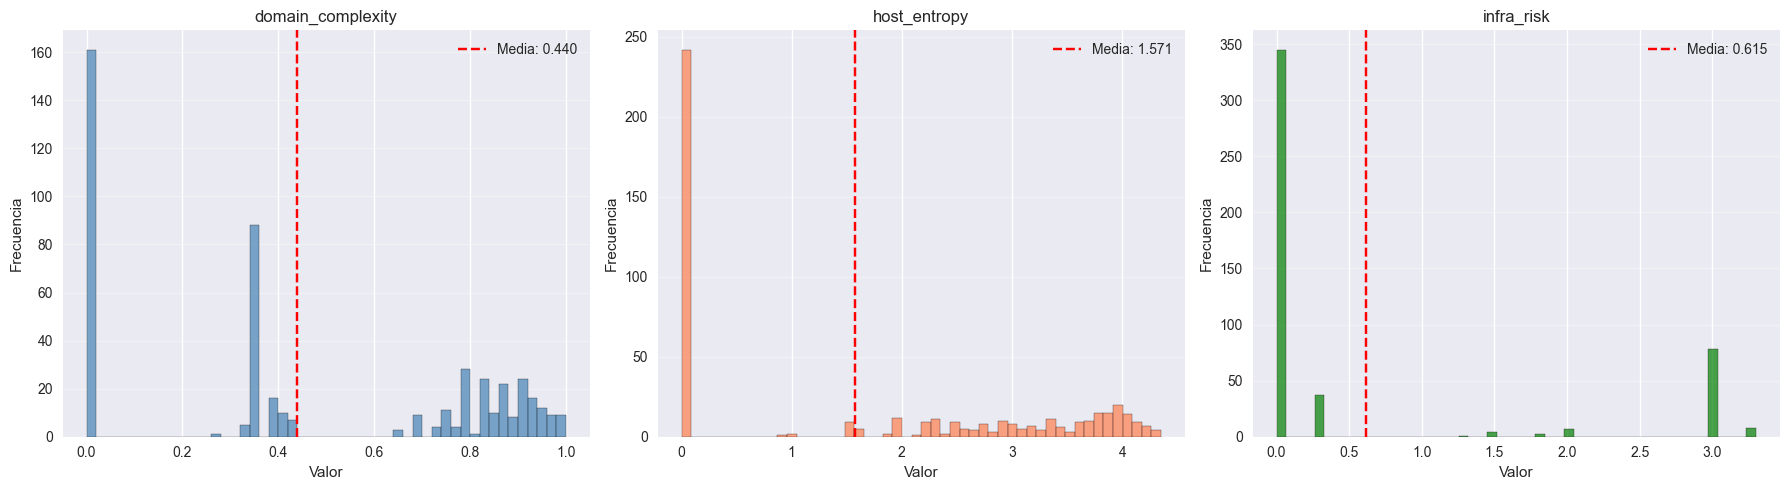

In [3]:
# Histogramas para features continuas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# domain_complexity
axes[0].hist(df["domain_complexity"], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_title('domain_complexity')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia')
axes[0].axvline(df["domain_complexity"].mean(), color='red', linestyle='--', label=f'Media: {df["domain_complexity"].mean():.3f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# host_entropy
axes[1].hist(df["host_entropy"], bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_title('host_entropy')
axes[1].set_xlabel('Valor')
axes[1].set_ylabel('Frecuencia')
axes[1].axvline(df["host_entropy"].mean(), color='red', linestyle='--', label=f'Media: {df["host_entropy"].mean():.3f}')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# infra_risk
axes[2].hist(df["infra_risk"], bins=50, color='green', alpha=0.7, edgecolor='black')
axes[2].set_title('infra_risk')
axes[2].set_xlabel('Valor')
axes[2].set_ylabel('Frecuencia')
axes[2].axvline(df["infra_risk"].mean(), color='red', linestyle='--', label=f'Media: {df["infra_risk"].mean():.3f}')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


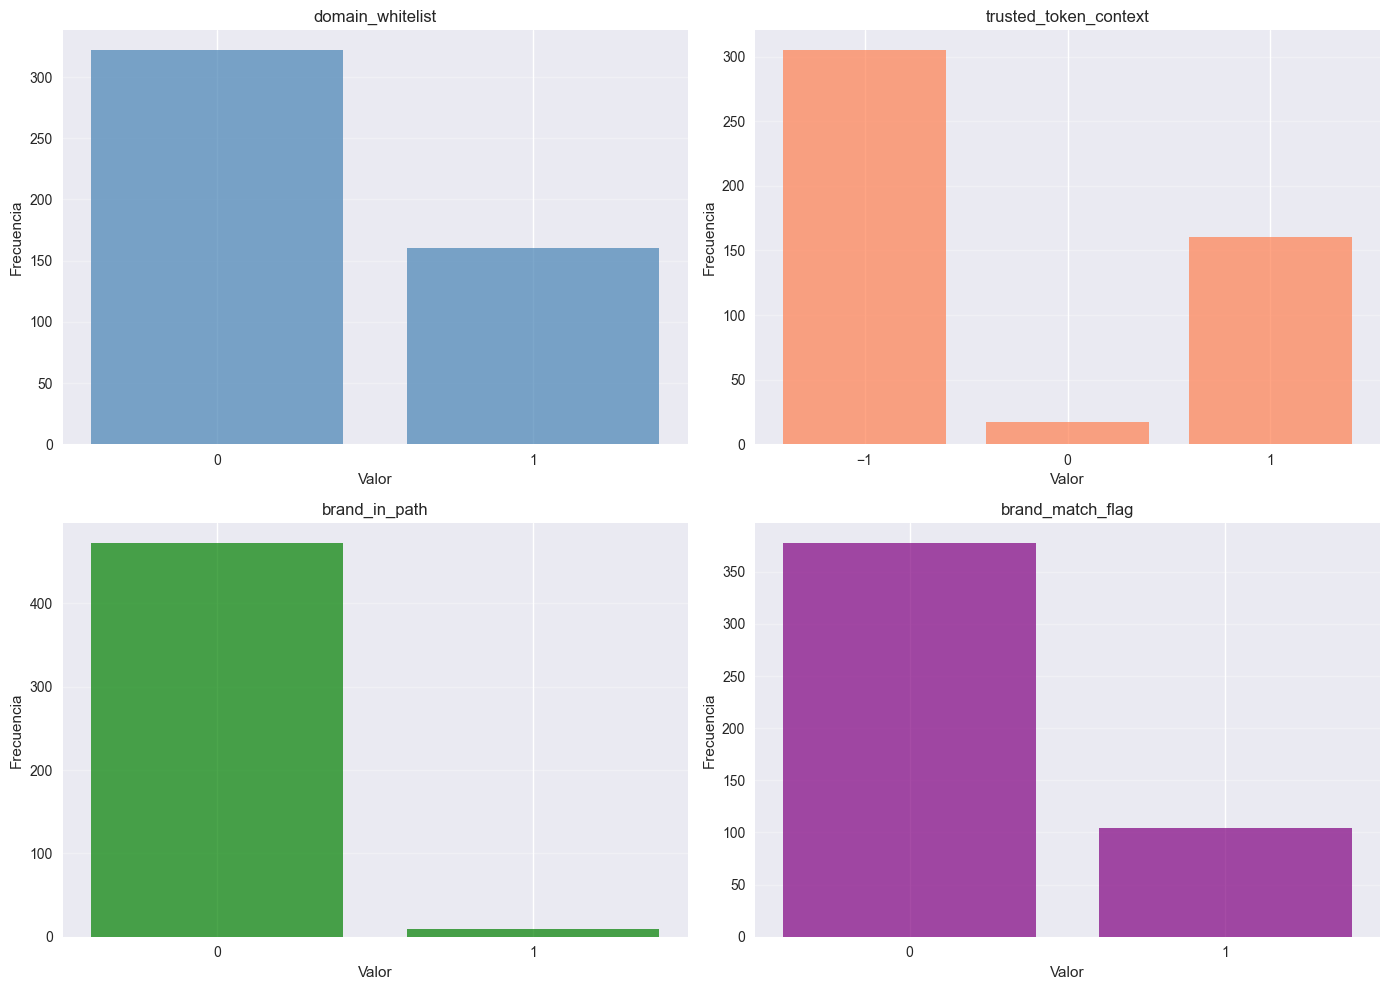

In [4]:
# Barplots para features categóricas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# domain_whitelist
dist_dw = df["domain_whitelist"].value_counts().sort_index()
axes[0, 0].bar(dist_dw.index, dist_dw.values, color='steelblue', alpha=0.7)
axes[0, 0].set_title('domain_whitelist')
axes[0, 0].set_xlabel('Valor')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].grid(axis='y', alpha=0.3)

# trusted_token_context
dist_ttc = df["trusted_token_context"].value_counts().sort_index()
axes[0, 1].bar(dist_ttc.index, dist_ttc.values, color='coral', alpha=0.7)
axes[0, 1].set_title('trusted_token_context')
axes[0, 1].set_xlabel('Valor')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_xticks([-1, 0, 1])
axes[0, 1].grid(axis='y', alpha=0.3)

# brand_in_path
dist_bip = df["brand_in_path"].value_counts().sort_index()
axes[1, 0].bar(dist_bip.index, dist_bip.values, color='green', alpha=0.7)
axes[1, 0].set_title('brand_in_path')
axes[1, 0].set_xlabel('Valor')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].grid(axis='y', alpha=0.3)

# brand_match_flag
dist_bmf = df["brand_match_flag"].value_counts().sort_index()
axes[1, 1].bar(dist_bmf.index, dist_bmf.values, color='purple', alpha=0.7)
axes[1, 1].set_title('brand_match_flag')
axes[1, 1].set_xlabel('Valor')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 3) Coherencia Estructural (Clave)


In [5]:
# Tabla de contingencia: trusted_token_context × domain_whitelist
contingency = pd.crosstab(df["trusted_token_context"], df["domain_whitelist"], margins=True)
print("=" * 80)
print("TABLA DE CONTINGENCIA: trusted_token_context × domain_whitelist")
print("=" * 80)
print(contingency)

# Verificar coherencia según contrato v3
print("\n" + "=" * 80)
print("VERIFICACIÓN DE COHERENCIA CONTRACTUAL")
print("=" * 80)

# Según MANIFIESTO_V3:
# - Si domain_whitelist == 1 → trusted_token_context debe ser +1
violations_1 = df[(df["domain_whitelist"] == 1) & (df["trusted_token_context"] != 1)]
print(f"\nViolaciones: domain_whitelist==1 pero TTC != +1: {len(violations_1)}")
if len(violations_1) > 0:
    print("URLs con violación:")
    print(violations_1[["url", "domain_whitelist", "trusted_token_context"]].head(10))

# - Si domain_whitelist == 0 y brand_match_flag == 1 → trusted_token_context debe ser 0
violations_2 = df[(df["domain_whitelist"] == 0) & (df["brand_match_flag"] == 1) & (df["trusted_token_context"] != 0)]
print(f"\nViolaciones: domain_whitelist==0 y brand_match_flag==1 pero TTC != 0: {len(violations_2)}")
if len(violations_2) > 0:
    print("URLs con violación:")
    print(violations_2[["url", "domain_whitelist", "brand_match_flag", "trusted_token_context"]].head(10))


TABLA DE CONTINGENCIA: trusted_token_context × domain_whitelist
domain_whitelist         0    1  All
trusted_token_context               
-1                     305    0  305
0                       17    0   17
1                        0  160  160
All                    322  160  482

VERIFICACIÓN DE COHERENCIA CONTRACTUAL

Violaciones: domain_whitelist==1 pero TTC != +1: 0

Violaciones: domain_whitelist==0 y brand_match_flag==1 pero TTC != 0: 0


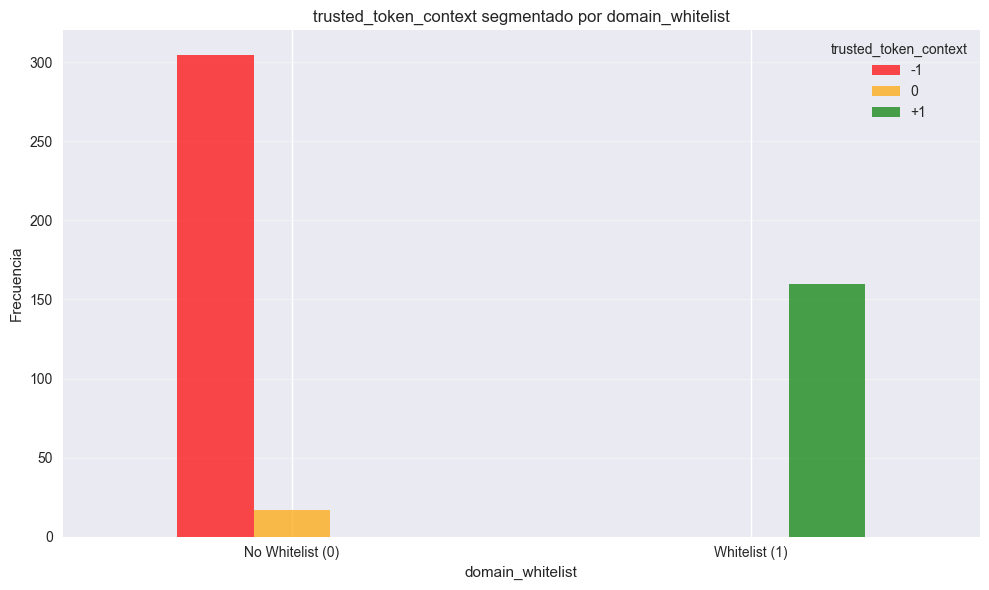

In [6]:
# Barplot TTC segmentado por whitelist
fig, ax = plt.subplots(figsize=(10, 6))

ttc_by_whitelist = pd.crosstab(df["domain_whitelist"], df["trusted_token_context"])
ttc_by_whitelist.plot(kind='bar', ax=ax, color=['red', 'orange', 'green'], alpha=0.7)
ax.set_title('trusted_token_context segmentado por domain_whitelist')
ax.set_xlabel('domain_whitelist')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels(['No Whitelist (0)', 'Whitelist (1)'], rotation=0)
ax.legend(title='trusted_token_context', labels=['-1', '0', '+1'])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 4) Separación por Clase (Phishing vs Legítimo)


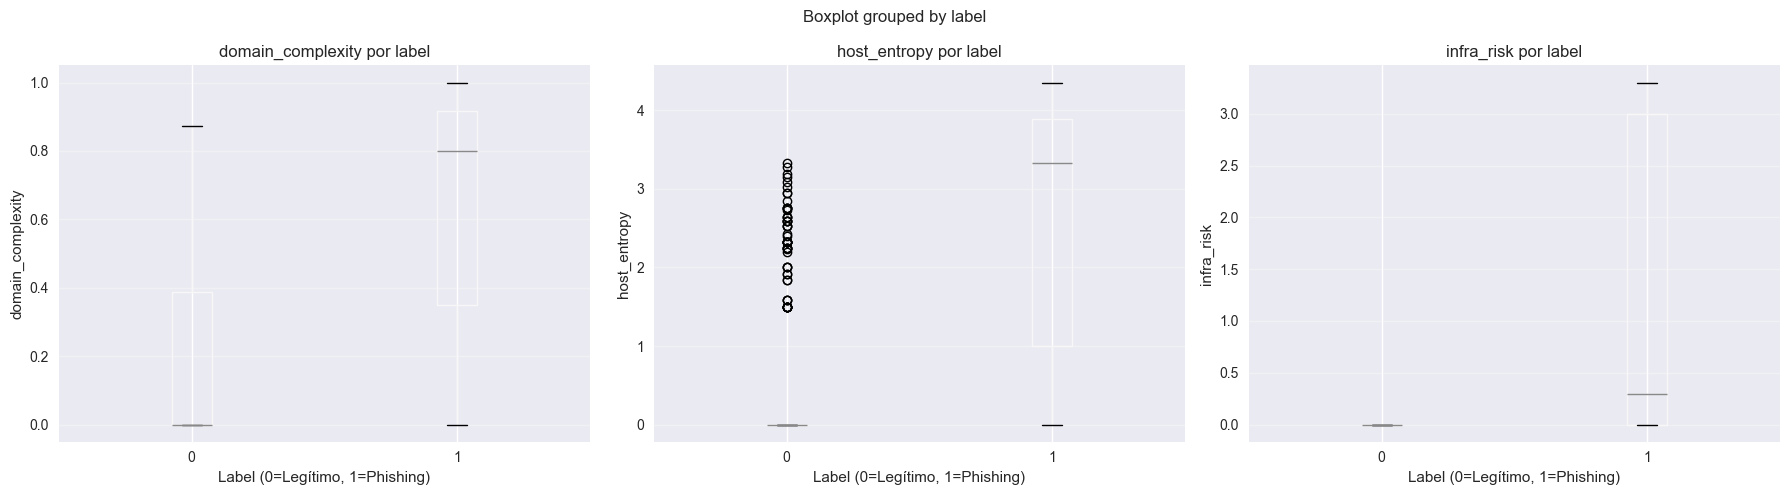

In [7]:
# Boxplots comparativos por label para features continuas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# domain_complexity
df.boxplot(column='domain_complexity', by='label', ax=axes[0])
axes[0].set_title('domain_complexity por label')
axes[0].set_xlabel('Label (0=Legítimo, 1=Phishing)')
axes[0].set_ylabel('domain_complexity')
axes[0].grid(axis='y', alpha=0.3)

# host_entropy
df.boxplot(column='host_entropy', by='label', ax=axes[1])
axes[1].set_title('host_entropy por label')
axes[1].set_xlabel('Label (0=Legítimo, 1=Phishing)')
axes[1].set_ylabel('host_entropy')
axes[1].grid(axis='y', alpha=0.3)

# infra_risk
df.boxplot(column='infra_risk', by='label', ax=axes[2])
axes[2].set_title('infra_risk por label')
axes[2].set_xlabel('Label (0=Legítimo, 1=Phishing)')
axes[2].set_ylabel('infra_risk')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


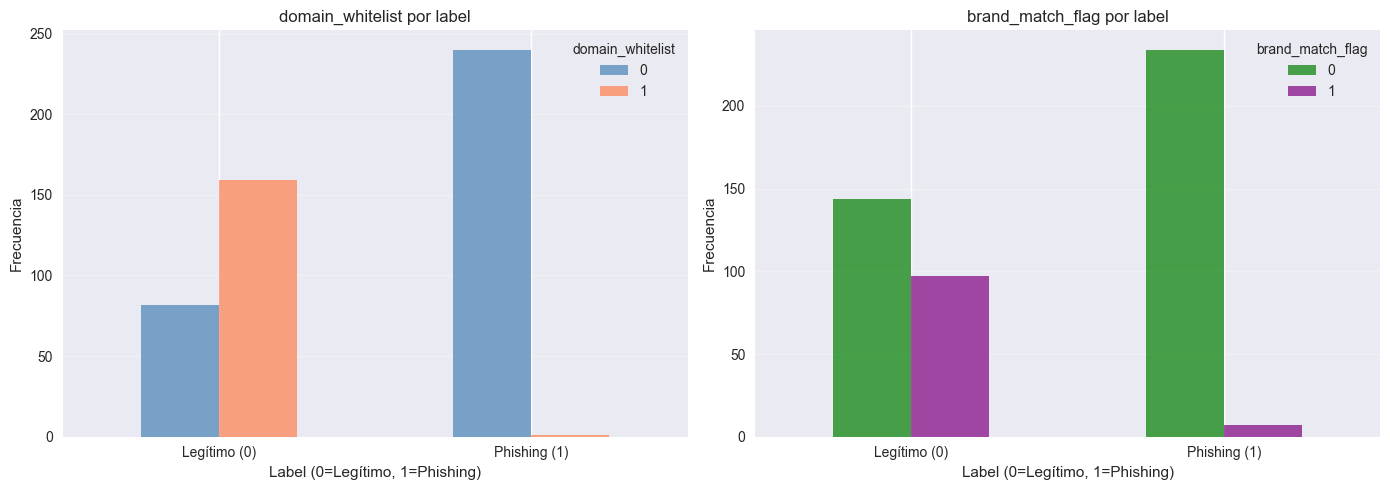

In [8]:
# Barplots para features categóricas por label
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# domain_whitelist por label
dw_by_label = pd.crosstab(df["label"], df["domain_whitelist"])
dw_by_label.plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'], alpha=0.7)
axes[0].set_title('domain_whitelist por label')
axes[0].set_xlabel('Label (0=Legítimo, 1=Phishing)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xticklabels(['Legítimo (0)', 'Phishing (1)'], rotation=0)
axes[0].legend(title='domain_whitelist', labels=['0', '1'])
axes[0].grid(axis='y', alpha=0.3)

# brand_match_flag por label
bmf_by_label = pd.crosstab(df["label"], df["brand_match_flag"])
bmf_by_label.plot(kind='bar', ax=axes[1], color=['green', 'purple'], alpha=0.7)
axes[1].set_title('brand_match_flag por label')
axes[1].set_xlabel('Label (0=Legítimo, 1=Phishing)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xticklabels(['Legítimo (0)', 'Phishing (1)'], rotation=0)
axes[1].legend(title='brand_match_flag', labels=['0', '1'])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 5) Análisis de Colas y Extremos (Muy Importante)


In [9]:
# Top 15 URLs con mayor host_entropy
print("=" * 80)
print("TOP 15 URLs - MAYOR host_entropy")
print("=" * 80)
top_host_entropy = df.nlargest(15, 'host_entropy')[['url', 'label', 'sector', 'entidad', 'host_entropy']]
print(top_host_entropy.to_string(index=False))


TOP 15 URLs - MAYOR host_entropy
                                                                                                                                                                                                                  url  label    sector   entidad  host_entropy
                                                                                                                                  https://particulares-bancosantander-es-beyogal852715907.codeanyapp.com/es/index.php      1     banca santander      4.351837
                                                                  https://bancosantander-firma-es-account-activation-yakuzablyat101350359.codeanyapp.com/online1/particulares/home.php?web=succes&local=_&id=76276442      1     banca santander      4.301756
                                                                                                  http://correos.es-es-es-herramientas-localizador-envios.u962745a2w.ha005.t.justns.ru/71da2eb1bb4778f/sms

In [10]:
# Top 15 URLs con mayor infra_risk
print("=" * 80)
print("TOP 15 URLs - MAYOR infra_risk")
print("=" * 80)
top_infra_risk = df.nlargest(15, 'infra_risk')[['url', 'label', 'sector', 'entidad', 'infra_risk']]
print(top_infra_risk.to_string(index=False))


TOP 15 URLs - MAYOR infra_risk
                                                                                                                url  label    sector   entidad  infra_risk
                                                           http://ing-banco.es.swtest.ru/ing/ing/sms_code_error.php      1     banca       ing         3.3
                                     http://bbvaspaing.temp.swtest.ru/bbva21/bbva/area_cliente/smsconfirmacion.html      1     banca      bbva         3.3
                                                           http://nuevaentrega-b527a7.ingress-earth.ewp.live/amazon      1 logistica    amazon         3.3
http://correos.es-es-es-herramientas-localizador-envios.u962745a2w.ha005.t.justns.ru/71da2eb1bb4778f/sms/index.html      1 logistica   correos         3.3
                                 http://empresasone-b96935.ingress-comporellon.ewp.live/santander/clients/login.php      1     banca santander         3.3
                                       

In [11]:
# Top 15 URLs con mayor domain_complexity
print("=" * 80)
print("TOP 15 URLs - MAYOR domain_complexity")
print("=" * 80)
top_domain_complexity = df.nlargest(15, 'domain_complexity')[['url', 'label', 'sector', 'entidad', 'domain_complexity']]
print(top_domain_complexity.to_string(index=False))


TOP 15 URLs - MAYOR domain_complexity
                                                                                                             url  label    sector   entidad  domain_complexity
https://authline-checkappr0v.com.es/7aIT03j82stf28&sp_aqd=d2lkZ264DGsrFT5vGFGhuTrytrfgUygHjuyTtyYtFGbXJhaQ&th=3/      1  generico  generico           1.000000
                                                                              http://authline-checkappr0v.com.es      1  generico  generico           1.000000
                                                                                https://coinbasewalletsupport.es      1    cripto  coinbase           0.991577
                                                                                     https://netflix-pagos.blog/      1 streaming   netflix           0.988708
                                       https://www.redwood-consulting.com/particulares/correos.es-es/detalle.php      1 logistica   correos           0.986781
        

## 6) Análisis por Sector


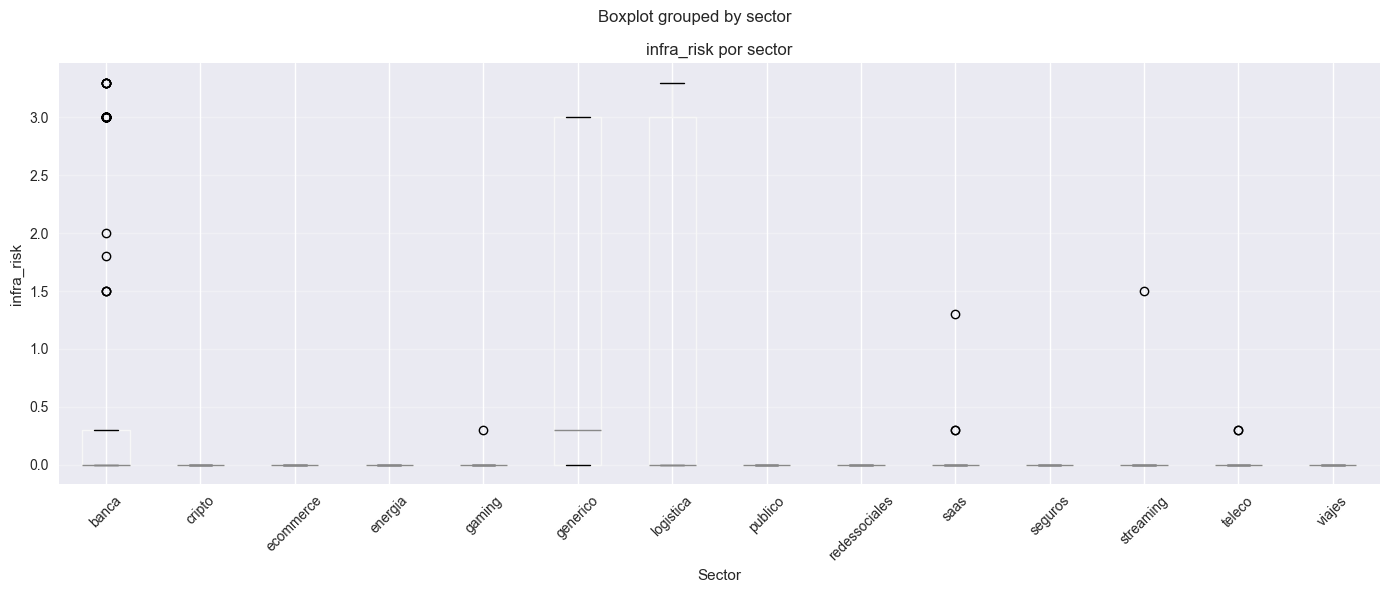

In [12]:
# Boxplot de infra_risk por sector
fig, ax = plt.subplots(figsize=(14, 6))
df.boxplot(column='infra_risk', by='sector', ax=ax, rot=45)
ax.set_title('infra_risk por sector')
ax.set_xlabel('Sector')
ax.set_ylabel('infra_risk')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


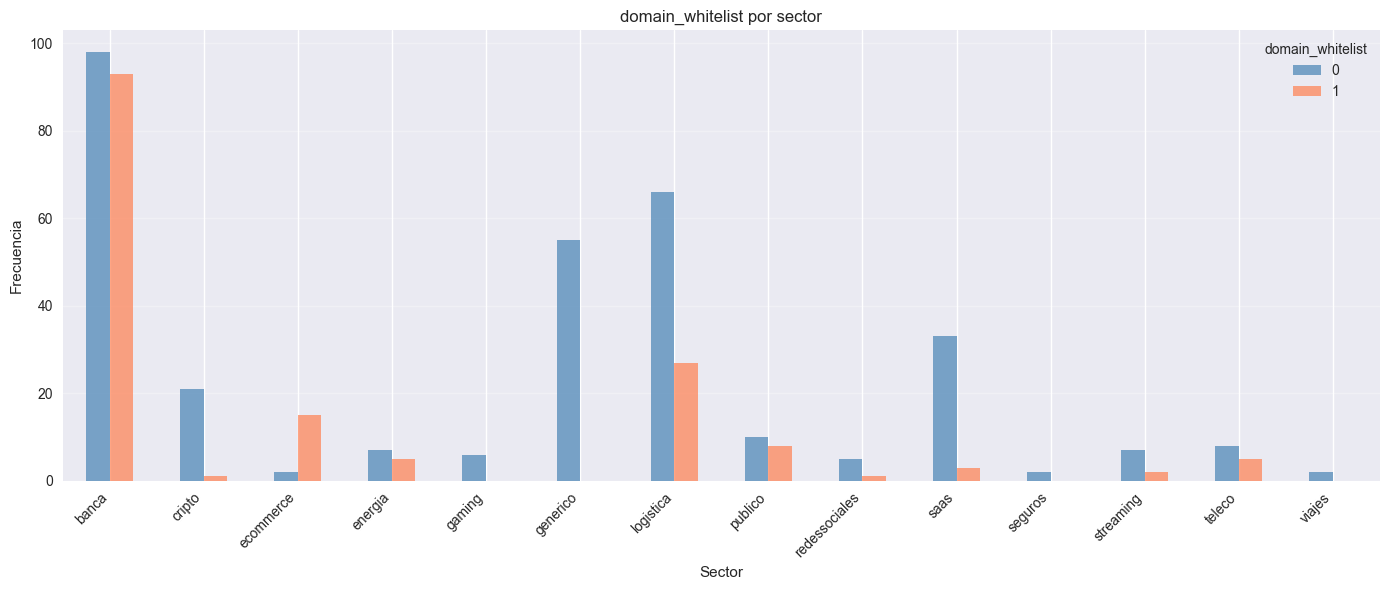

In [13]:
# Barplot de domain_whitelist por sector
dw_by_sector = pd.crosstab(df["sector"], df["domain_whitelist"])
fig, ax = plt.subplots(figsize=(14, 6))
dw_by_sector.plot(kind='bar', ax=ax, color=['steelblue', 'coral'], alpha=0.7)
ax.set_title('domain_whitelist por sector')
ax.set_xlabel('Sector')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title='domain_whitelist', labels=['0', '1'])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [14]:
# Tabla de conteo sector × label
print("=" * 80)
print("TABLA DE CONTINGENCIA: Sector × Label")
print("=" * 80)
sector_label = pd.crosstab(df["sector"], df["label"], margins=True)
print(sector_label)


TABLA DE CONTINGENCIA: Sector × Label
label            0    1  All
sector                      
banca           98   93  191
cripto          18    4   22
ecommerce       17    0   17
energia         10    2   12
gaming           3    3    6
generico         0   55   55
logistica       38   55   93
publico         12    6   18
redessociales    5    1    6
saas            25   11   36
seguros          2    0    2
streaming        4    5    9
teleco           7    6   13
viajes           2    0    2
All            241  241  482


## 7) Relaciones Internas entre Features


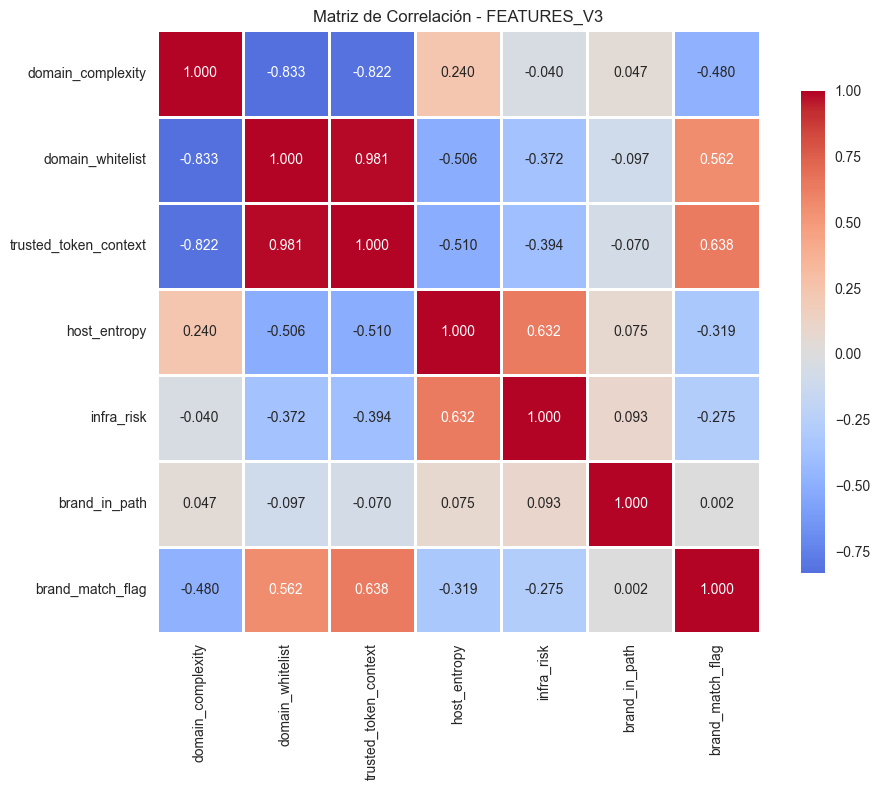


Matriz de correlación (valores):
                       domain_complexity  domain_whitelist  \
domain_complexity                  1.000            -0.833   
domain_whitelist                  -0.833             1.000   
trusted_token_context             -0.822             0.981   
host_entropy                       0.240            -0.506   
infra_risk                        -0.040            -0.372   
brand_in_path                      0.047            -0.097   
brand_match_flag                  -0.480             0.562   

                       trusted_token_context  host_entropy  infra_risk  \
domain_complexity                     -0.822         0.240      -0.040   
domain_whitelist                       0.981        -0.506      -0.372   
trusted_token_context                  1.000        -0.510      -0.394   
host_entropy                          -0.510         1.000       0.632   
infra_risk                            -0.394         0.632       1.000   
brand_in_path            

In [15]:
# Matriz de correlación SOLO de las 7 FEATURES_V3
corr_matrix = df[FEATURES_V3].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Matriz de Correlación - FEATURES_V3')
plt.tight_layout()
plt.show()

print("\nMatriz de correlación (valores):")
print(corr_matrix.round(3))


## 8) Checks de Diseño (Sin Opinión)


In [16]:
print("=" * 80)
print("CHECKS DE DISEÑO")
print("=" * 80)

print("\nRangos observados:")
print(f"  host_entropy: [{df['host_entropy'].min():.3f}, {df['host_entropy'].max():.3f}]")
print(f"  infra_risk: [{df['infra_risk'].min():.3f}, {df['infra_risk'].max():.3f}]")

print("\nCardinalidad real de trusted_token_context:")
print(f"  Valores únicos: {sorted(df['trusted_token_context'].unique())}")
print(f"  Distribución:")
print(df['trusted_token_context'].value_counts().sort_index())

print("\nPorcentaje de URLs whitelisted:")
pct_whitelisted = (df['domain_whitelist'] == 1).sum() / len(df) * 100
print(f"  {pct_whitelisted:.2f}% ({df['domain_whitelist'].sum()}/{len(df)})")


CHECKS DE DISEÑO

Rangos observados:
  host_entropy: [-0.000, 4.352]
  infra_risk: [0.000, 3.300]

Cardinalidad real de trusted_token_context:
  Valores únicos: [np.int64(-1), np.int64(0), np.int64(1)]
  Distribución:
trusted_token_context
-1    305
 0     17
 1    160
Name: count, dtype: int64

Porcentaje de URLs whitelisted:
  33.20% (160/482)


## 9) Resumen Final Automático


In [17]:
# Tabla resumen automática
summary_data = []

for feat in FEATURES_V3:
    if df[feat].dtype in ['int64', 'float64']:
        min_val = df[feat].min()
        max_val = df[feat].max()
        mean_val = df[feat].mean()
        std_val = df[feat].std()
        
        # % de ceros (solo para features numéricas)
        if df[feat].dtype == 'int64':
            pct_zeros = (df[feat] == 0).sum() / len(df) * 100
        else:
            pct_zeros = (df[feat] == 0.0).sum() / len(df) * 100
        
        summary_data.append({
            'feature': feat,
            'min': f"{min_val:.3f}",
            'max': f"{max_val:.3f}",
            'mean': f"{mean_val:.3f}",
            'std': f"{std_val:.3f}",
            '%zeros': f"{pct_zeros:.2f}%"
        })

summary_df = pd.DataFrame(summary_data)
print("=" * 80)
print("RESUMEN FINAL AUTOMÁTICO")
print("=" * 80)
print(summary_df.to_string(index=False))


RESUMEN FINAL AUTOMÁTICO
              feature    min   max   mean   std %zeros
    domain_complexity  0.000 1.000  0.440 0.372 33.40%
     domain_whitelist  0.000 1.000  0.332 0.471 66.80%
trusted_token_context -1.000 1.000 -0.301 0.936  3.53%
         host_entropy -0.000 4.352  1.571 1.684 50.21%
           infra_risk  0.000 3.300  0.615 1.167 71.58%
        brand_in_path  0.000 1.000  0.019 0.136 98.13%
     brand_match_flag  0.000 1.000  0.216 0.412 78.42%


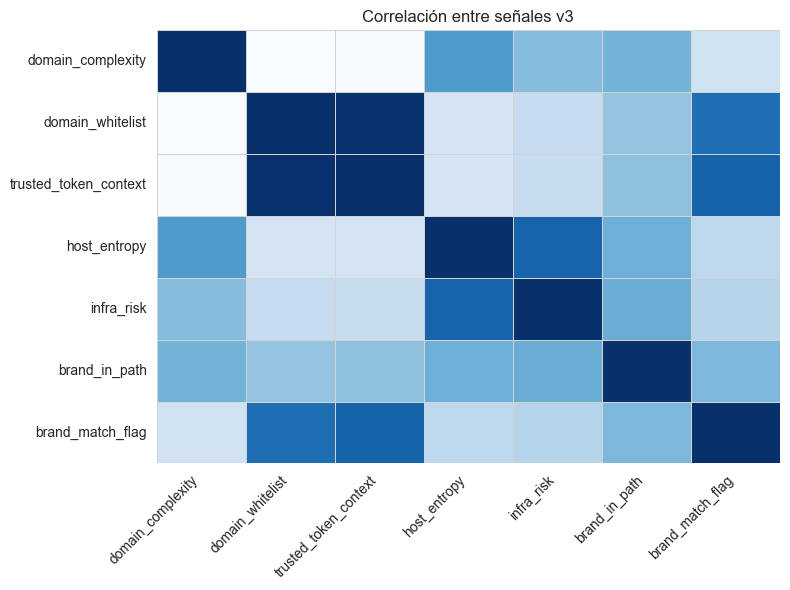

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Asumiendo que `df` es el DataFrame que ya contiene las columnas necesarias
features = [
    'domain_complexity', 'domain_whitelist', 'trusted_token_context',
    'host_entropy', 'infra_risk', 'brand_in_path', 'brand_match_flag'
]

# Calcular la matriz de correlación
corr = df[features].corr()

# Configuración de la figura
plt.figure(figsize=(8, 6))

# Matriz de correlación
sns.heatmap(corr, annot=False, cmap='Blues', linewidths=0.5, linecolor='lightgray', cbar=False)

# Configurar títulos y ejes
plt.title('Correlación entre señales v3')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Ajuste de la visualización
plt.tight_layout()

# Mostrar la gráfica
plt.show()